In [146]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline




In [147]:
df=pd.read_csv("census_town_data_at_district_level_Explorin.csv")
df.head()

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,...,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
0,1,jammu & kashmir,0,towns are spread over in more then one district.,204812.0,1357011,709542.0,647469.0,999.0,926.0,...,2.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
1,1,jammu & kashmir,1,kupwara,11999.0,104729,62152.0,42577.0,176.0,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,jammu & kashmir,2,badgam,10743.0,78360,44768.0,33592.0,282.0,265.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,jammu & kashmir,3,leh (ladakh),7004.0,45671,30560.0,15111.0,380.0,355.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,jammu & kashmir,4,kargil,2191.0,16338,10082.0,6256.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [148]:
df.drop(df.iloc[:, 6:], inplace = True, axis = 1)
  
df

,state_code,state_name,district_code,district_name,total_households,total_population
0,1,jammu & kashmir,0,towns are spread over in more then one district.,204812.0,1357011
1,1,jammu & kashmir,1,kupwara,11999.0,104729
2,1,jammu & kashmir,2,badgam,10743.0,78360
3,1,jammu & kashmir,3,leh (ladakh),7004.0,45671
4,1,jammu & kashmir,4,kargil,2191.0,16338
...,...,...,...,...,...,...
633,34,puducherry,635,puducherry,162016.0,657209
634,34,puducherry,636,mahe,7420.0,41816
635,34,puducherry,637,karaikal,24184.0,98102
636,35,andaman & nicobar island,639,north & middle andaman district,724.0,2741


In [149]:
df.drop(df.columns[[0, 2]], axis = 1, inplace = True)
  
df

,state_name,district_name,total_households,total_population
0,jammu & kashmir,towns are spread over in more then one district.,204812.0,1357011
1,jammu & kashmir,kupwara,11999.0,104729
2,jammu & kashmir,badgam,10743.0,78360
3,jammu & kashmir,leh (ladakh),7004.0,45671
4,jammu & kashmir,kargil,2191.0,16338
...,...,...,...,...
633,puducherry,puducherry,162016.0,657209
634,puducherry,mahe,7420.0,41816
635,puducherry,karaikal,24184.0,98102
636,andaman & nicobar island,north & middle andaman district,724.0,2741


In [150]:
df = df.loc[df['total_population'] > 1000000]
df

,state_name,district_name,total_households,total_population
0,jammu & kashmir,towns are spread over in more then one district.,204812.0,1357011
35,punjab,jalandhar,247953.0,1155128
39,punjab,ludhiana,436030.0,2069708
47,punjab,amritsar,273905.0,1358933
53,chandigarh,chandigarh,234033.0,1026459
...,...,...,...,...
621,tamil nadu,madurai,479851.0,1846801
626,tamil nadu,tirunelveli,396471.0,1520229
627,tamil nadu,kanniyakumari,398061.0,1539802
630,tamil nadu,coimbatore,715878.0,2618940


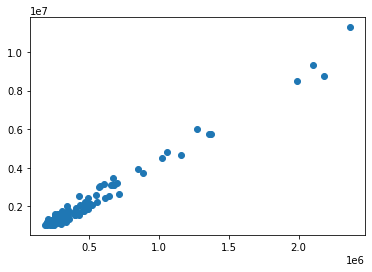

In [151]:
plt.scatter(df['total_households'],df['total_population'])

In [152]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [153]:
y_predicted=km.fit_predict(df[['total_households','total_population']])
y_predicted

array([1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 0, 1, 4, 1,
       0, 0, 1, 1, 4, 1, 1, 1, 0, 1, 3, 4, 0, 3, 4, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 1, 3, 4, 1, 4, 3, 1, 1, 0, 1, 4, 2, 2, 0, 3, 1, 1, 0, 0, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 3, 4, 1,
       4, 1, 1, 4, 1, 1, 4, 1])

In [154]:
df['cluster']=y_predicted
df.head()

C:\Users\Ankit\AppData\Local\Temp/ipykernel_13136/4151433828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


,state_name,district_name,total_households,total_population,cluster
0,jammu & kashmir,towns are spread over in more then one district.,204812.0,1357011,1
35,punjab,jalandhar,247953.0,1155128,1
39,punjab,ludhiana,436030.0,2069708,4
47,punjab,amritsar,273905.0,1358933,1
53,chandigarh,chandigarh,234033.0,1026459,1


In [155]:
km.cluster_centers_

array([[ 685979.7       , 3276814.3       ],
       [ 280023.52830189, 1303979.28301887],
       [2159995.75      , 9478485.5       ],
       [1205225.16666667, 5241538.33333333],
       [ 483490.13043478, 2125401.08695652]])

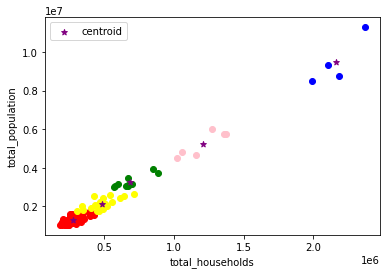

In [156]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]


plt.scatter(df1.total_households,df1['total_population'],color='green')
plt.scatter(df2.total_households,df2['total_population'],color='red')
plt.scatter(df3.total_households,df3['total_population'],color='blue')
plt.scatter(df4.total_households,df4['total_population'],color='pink')
plt.scatter(df5.total_households,df5['total_population'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


plt.xlabel('total_households')
plt.ylabel('total_population')
plt.legend()

In [157]:
df.isnull().sum()

state_name          0
district_name       0
total_households    0
total_population    0
cluster             0
dtype: int64

In [158]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['total_population','total_households']])
    sse.append(km.inertia_)


In [159]:
sse


[349961724048750.6,
 96267560280260.1,
 39160867566309.86,
 19240503806182.32,
 12187893738116.514,
 7744369298934.096,
 5452950385466.389,
 3436112278099.7036,
 2628383317132.447]

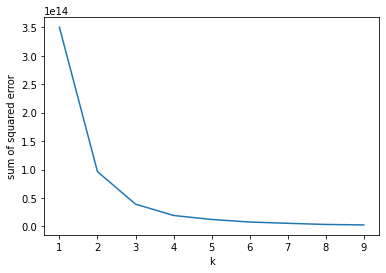

In [160]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [161]:
# so elbow is at 3

In [162]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [163]:
y_predicted=km.fit_predict(df[['total_households','total_population']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [164]:
df['cluster']=y_predicted
df.head(10)

C:\Users\Ankit\AppData\Local\Temp/ipykernel_13136/1410016022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


,state_name,district_name,total_households,total_population,cluster
0,jammu & kashmir,towns are spread over in more then one district.,204812.0,1357011,0
35,punjab,jalandhar,247953.0,1155128,0
39,punjab,ludhiana,436030.0,2069708,0
47,punjab,amritsar,273905.0,1358933,0
53,chandigarh,chandigarh,234033.0,1026459,0
84,haryana,gurgaon,237750.0,1042253,0
86,haryana,faridabad,295553.0,1438855,0
88,nct of delhi,towns are spread over in more than one district.,2366175.0,11292358,2
89,nct of delhi,north west,258455.0,1353743,0
91,nct of delhi,north-east,185299.0,1038490,0


In [165]:
#  cluster of haryana has 0 value so we can take any five of the district with 0 cluster value

In [167]:
df = df.loc[df['cluster'] == 0]
df

,state_name,district_name,total_households,total_population,cluster
0,jammu & kashmir,towns are spread over in more then one district.,204812.0,1357011,0
35,punjab,jalandhar,247953.0,1155128,0
39,punjab,ludhiana,436030.0,2069708,0
47,punjab,amritsar,273905.0,1358933,0
53,chandigarh,chandigarh,234033.0,1026459,0
...,...,...,...,...,...
621,tamil nadu,madurai,479851.0,1846801,0
626,tamil nadu,tirunelveli,396471.0,1520229,0
627,tamil nadu,kanniyakumari,398061.0,1539802,0
630,tamil nadu,coimbatore,715878.0,2618940,0


In [ ]:
# final choice for district is jalander, ludhiana ,amritsar ,chandigarh,madurai